In [3]:
import pandas as pd
df1 = pd.read_csv('StreamingHistory0.csv')
df2 = pd.read_csv('StreamingHistory1.csv')

df_joined = pd.concat([df1, df2])
df_joined.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-15 22:12,Korn,Blind,171780
1,2021-03-16 16:02,Korn,Blind,8500
2,2021-03-16 16:09,Vulfpeck,Dean Town,70270
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,155280
4,2021-03-16 16:12,Vulfpeck,Cory Wong,830


In [11]:
df_joined[df_joined['artistName'] == 'Korn']

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.780,2.863000
1,2021-03-16 16:02,Korn,Blind,2021,03,16:02,8.500,0.141667
224,2021-03-19 14:56,Korn,Word Up!,2021,03,14:56,172.666,2.877767
225,2021-03-19 14:58,Korn,Coming Undone,2021,03,14:58,68.043,1.134050
234,2021-03-19 15:03,Korn,Twisted Transistor,2021,03,15:03,1.018,0.016967
237,2021-03-19 15:09,Korn,Y'all Want a Single,2021,03,15:09,114.370,1.906167
264,2021-03-21 14:35,Korn,Here to Stay,2021,03,14:35,28.412,0.473533
265,2021-03-21 15:16,Korn,Here to Stay,2021,03,15:16,1.450,0.024167
5565,2021-07-29 19:45,Korn,Word Up!,2021,07,19:45,2.930,0.048833
6563,2021-08-13 20:05,Korn,Here to Stay,2021,08,20:05,270.960,4.516000


In [5]:
df_joined.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-15 22:12,Korn,Blind,171780
1,2021-03-16 16:02,Korn,Blind,8500
2,2021-03-16 16:09,Vulfpeck,Dean Town,70270
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,155280
4,2021-03-16 16:12,Vulfpeck,Cory Wong,830


In [6]:
df_joined['year'] = df_joined['endTime'].str.split('-').str[0]
df_joined.head()

,endTime,artistName,trackName,msPlayed,year
0,2021-03-15 22:12,Korn,Blind,171780,2021
1,2021-03-16 16:02,Korn,Blind,8500,2021
2,2021-03-16 16:09,Vulfpeck,Dean Town,70270,2021
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,155280,2021
4,2021-03-16 16:12,Vulfpeck,Cory Wong,830,2021


In [7]:
df_joined['month'] = df_joined['endTime'].str.split('-').str[1]
df_joined['time'] = df_joined['endTime'].str.split(' ').str[1]
df_joined['seconds_played'] = df_joined['msPlayed']/1000
df_joined['minutes_played'] = df_joined['seconds_played']/60
df_joined.drop('msPlayed', inplace=True, axis=1)

In [8]:
df_joined

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.780,2.863000
1,2021-03-16 16:02,Korn,Blind,2021,03,16:02,8.500,0.141667
2,2021-03-16 16:09,Vulfpeck,Dean Town,2021,03,16:09,70.270,1.171167
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,2021,03,16:12,155.280,2.588000
4,2021-03-16 16:12,Vulfpeck,Cory Wong,2021,03,16:12,0.830,0.013833
...,...,...,...,...,...,...,...,...
2674,2022-03-16 21:20,Canned Heat,Going Up The Country,2022,03,21:20,5.089,0.084817
2675,2022-03-16 21:35,Grateful Dead,Shakedown Street - 2013 Remaster,2022,03,21:35,2.800,0.046667
2676,2022-03-16 23:59,The Alan Parsons Project,Eye In The Sky,2022,03,23:59,276.280,4.604667
2677,2022-03-16 23:59,The Alan Parsons Project,Snake Eyes,2022,03,23:59,0.000,0.000000


In [9]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12679 entries, 0 to 2678
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   endTime         12679 non-null  object 
 1   artistName      12679 non-null  object 
 2   trackName       12679 non-null  object 
 3   year            12679 non-null  object 
 4   month           12679 non-null  object 
 5   time            12679 non-null  object 
 6   seconds_played  12679 non-null  float64
 7   minutes_played  12679 non-null  float64
dtypes: float64(2), object(6)
memory usage: 891.5+ KB


In [10]:
df_joined.to_csv('spotify_joined.csv')

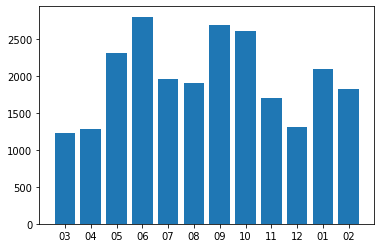

In [73]:
import matplotlib.pyplot as plt

minutes_sum = []

for i in df_joined['minutes_played'].groupby(df_joined['month']).sum():
    minutes_sum.append(i)

months = df_joined['month'].unique()

plt.bar(months, minutes_sum)
plt.show()